In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pyDSA_core as dsa

import imutils

In [2]:
import os
path = os.path.abspath(dsa.__file__)
print(path)

/home/bofeng/anaconda3/lib/python3.7/site-packages/pyDSA_core/__init__.py


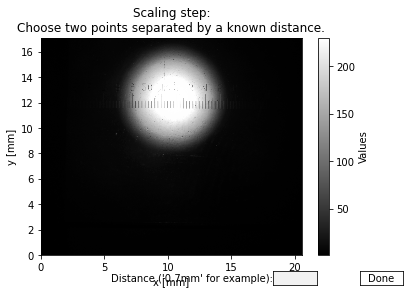

[None, None]

In [3]:
im_sca = dsa.import_from_image('/home/bofeng/Downloads/05,07,2021/scale.png', dx=1/120, dy=1/120, unit_x='mm', unit_y='mm')
im_sca.scale_interactive()

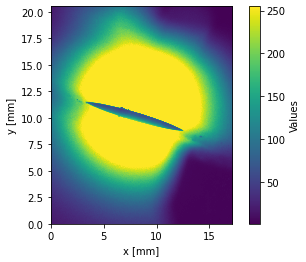

In [6]:
img_profil = dsa.import_from_image('/home/bofeng/Downloads/05,07,2021/profil.png', dx=1/120, dy=1/120, unit_x='mm', unit_y='mm')
plt.figure()
img_profil.display()
plt.show()

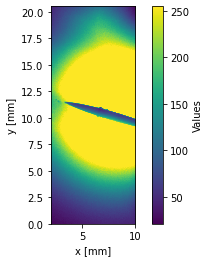

In [7]:
img_profil.crop(intervx=[2, 10], intervy=[0, 200], inplace=True)
# Display
plt.figure()
img_profil.display()
plt.show()

In [3]:
def img_show(img):
    plt.figure()
    plt.imshow(img)
    #plt.colorbar()
    plt.show()
    img.shape

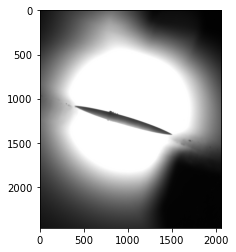

In [9]:
img_path = '/home/bofeng/Downloads/05,07,2021/profil.png'
img = cv2.imread(img_path,1)
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_show(img = img)

In [7]:
img_ = imgGray[:]
img__ = img_ [1000:1500, 300:1500] 
thres_min = img.min()
thres_max = img.max()

In [39]:
img_show(img = img__)
ret, img_thres = cv2.threshold(img__, 140, 255, cv2.THRESH_BINARY_INV);
img_show(img = img_thres)

NameError: name 'img__' is not defined

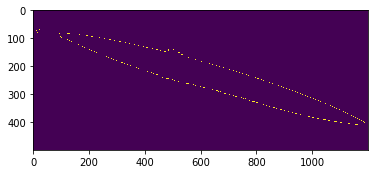

In [6]:
edges = cv2.Canny(img_thres, 10, 10)
img_show(img = edges)

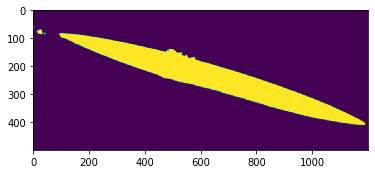

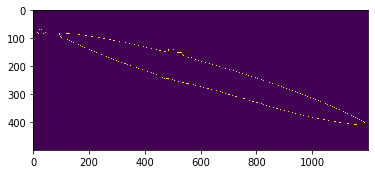

In [7]:
imgBlur = cv2.GaussianBlur(img_thres, (9, 9), 1)
img_show(img = imgBlur)
edges_ = cv2.Canny(imgBlur, 1, 1)
img_show(img = edges_)

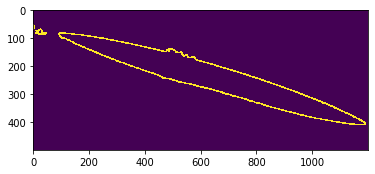

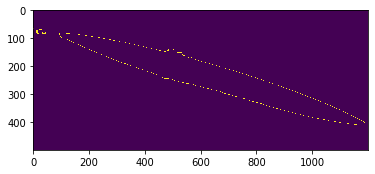

In [8]:
Kernel_dial = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
Kernel_ero = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

imgDial = cv2.dilate(edges_, Kernel_dial, iterations=1)
img_show(img = imgDial)
imgEro = cv2.erode(imgDial, Kernel_ero, iterations=1)
img_show(img = imgEro)

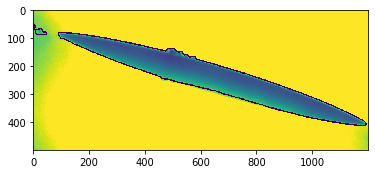

In [9]:
contours, hierarchy = cv2.findContours(np.array(imgDial, dtype=np.uint8), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img__, contours, -1, (0, 255, 0), 3)
img_show(img__)

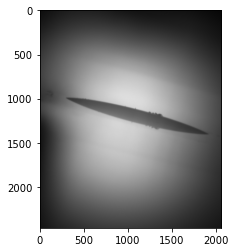

In [4]:
img_path = "/home/bofeng/Desktop/BAM/Robot_platform/OpenCV/img_contact_angle/21.png"
img = cv2.imread(img_path,1)
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
def img_show(img):
    plt.figure()
    plt.imshow(img)
    #plt.colorbar()
    plt.show()
    img.shape
img_show(img = img)

In [5]:
img_ = imgGray[:]
#img__ = img_ [200:2000, 300:1500] 
thres_min = img.min()
thres_max = img.max()
print(thres_min)
print(thres_max)

6
233


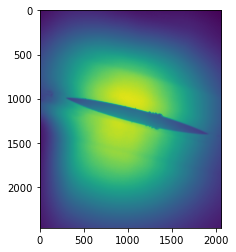

100.0


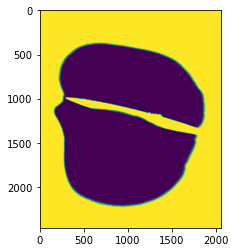

In [6]:
img_show(img = img_)
ret, img_thres = cv2.threshold(img_, 100, 255, cv2.THRESH_BINARY_INV);
print(ret)
img_show(img = img_thres)

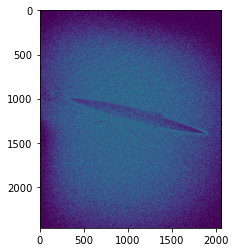

In [7]:
edges = cv2.Canny(img_, 10, 10)
img_show(img = edges)

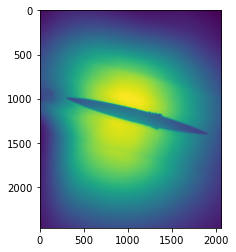

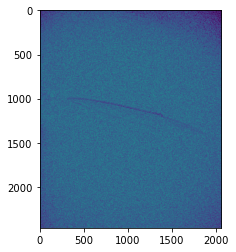

In [38]:
blurred = cv2.blur(img_, (9, 9))
imgBlur = cv2.GaussianBlur(blurred, (11, 11),1)
img_show(img = blurred)
edges = cv2.Canny(img_, 5, 5)
cv2.imwrite('edges.png',edges)

img_show(img = edges)

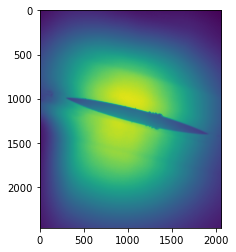

In [9]:
gray = np.float32(imgGray)
img_show(img = gray)

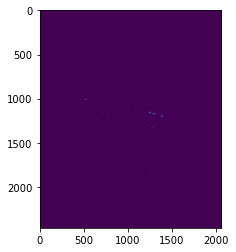

In [40]:
dst = cv2.cornerHarris(gray,10,1,0.05)
cv2.imwrite('Harris.png',dst)
img_show(img = dst)

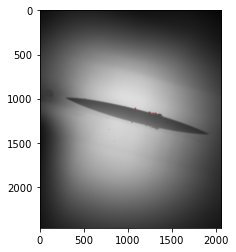

'\n\nprint ("Threshold:",fast.getInt(\'threshold\'))\nprint ("nonmaxSoppression:",fast.getBool(\'nonmaxSuppression\'))\nprint ("neighborhood:",fast.getInt(\'type\'))\nprint ("Total Keypoints with nonmaxSuppression:",len(kp))\n\ncv2.imwrite(\'fast_true.png\', img2)\nfast.setBool(\'nonmaxSuppression\',0)\nkp = fast.detect(gray,None)\nprint ("Total Keypoints without nonmaxSuppression:",len(kp))\nimg3 = cv2.drawKeypoints(img, kp, color=(255,0,0))\ncv2.imwrite(\'fast_false.png\', img3)\n'

In [33]:
img_fast = cv2.imread( "/home/bofeng/Desktop/BAM/Robot_platform/OpenCV/img_contact_angle/21.png",0)

fast = cv2.FastFeatureDetector_create()
kp = fast.detect(img_fast,None)
img2 = cv2.drawKeypoints(img_fast, kp, outImage=None, color=(255,0,0))

img_show(img = img2)

cv2.imwrite('fast_true.png',img2)



"""
print ("Threshold:",fast.getInt('threshold'))
print ("nonmaxSoppression:",fast.getBool('nonmaxSuppression'))
print ("neighborhood:",fast.getInt('type'))
print ("Total Keypoints with nonmaxSuppression:",len(kp))

cv2.imwrite('fast_true.png', img2)
fast.setBool('nonmaxSuppression',0)
kp = fast.detect(gray,None)
print ("Total Keypoints without nonmaxSuppression:",len(kp))
img3 = cv2.drawKeypoints(img, kp, color=(255,0,0))
cv2.imwrite('fast_false.png', img3)
"""

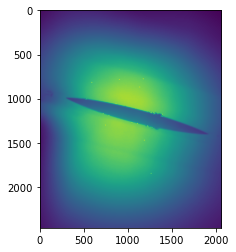

True

In [37]:
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(gray,(x,y),3,255,-1)

plt.imshow(gray),plt.show()
cv2.imwrite('Shi-Tomasi.png',gray)

In [ ]:
img_harris = cv2.imread( "/home/bofeng/Desktop/BAM/Robot_platform/OpenCV/img_contact_angle/21.png",0)
